РК №1 ТМО. Валова София ИУ5-63Б
Вариант №2 - Задача 1, датасет wine
Задание:
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Для произвольной колонки данных построить график "Ящик с усами (boxplot)". Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель. 

In [35]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка набора данных и преобразование в дата-фрейм
wine = load_wine()
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= list(wine['feature_names']) + ['target'])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [37]:
#В задании указано заполнить строки или столбцы пустыми значениями, если их нет
df.loc[[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'total_phenols'] = np.nan
df.isnull().sum()

alcohol                          0
malic_acid                       0
ash                              0
alcalinity_of_ash                0
magnesium                        0
total_phenols                   11
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                  0
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
target                           0
dtype: int64

In [38]:
# Заполнила в одном столбце 11 строк пустыми данными, теперь очищу
df.dropna(inplace=True)
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

<Axes: >

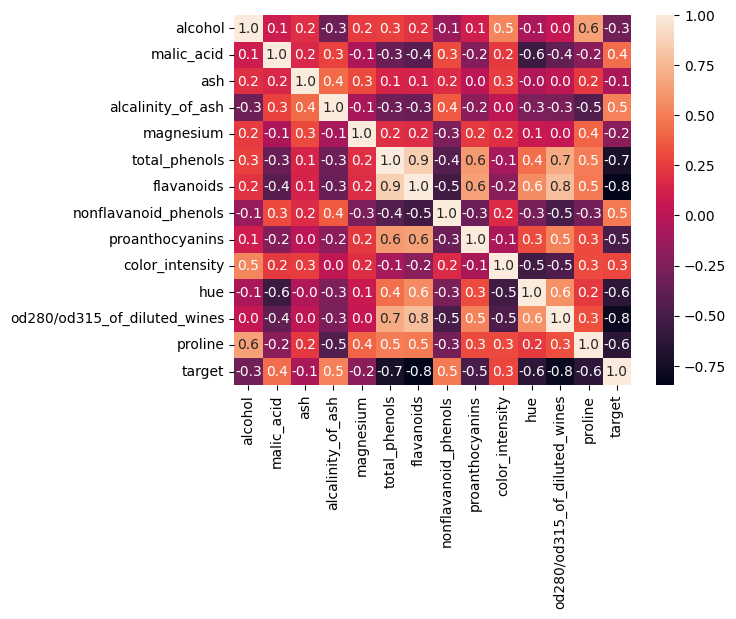

In [39]:
# Корреляционный анализ
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f",)

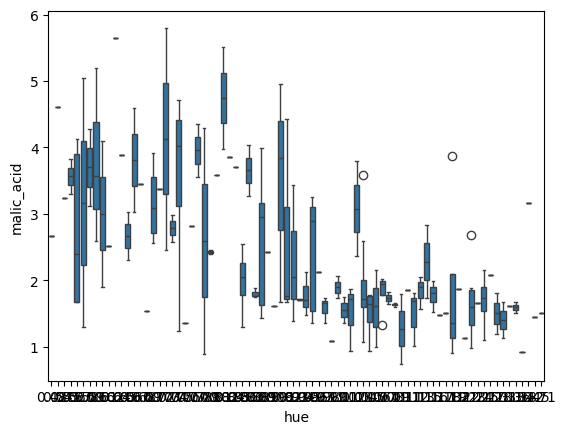

In [24]:
# График "Ящик с усами"
sns.boxplot(x=df['hue'], y=df['malic_acid'])
plt.show()

Вывод: обратившись к матрице, можно заметить высокую отрицательную корреляцию и низкую между разными признаками и целевым признаком, поэтому их можно использовать для модели, при этом есть переменные, которые сильно коррелируют между собой, их не следует использовать, так как они могут влиять на результат не должным образом; в целом датасет подходит для построения моделей машинного обучения